# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

### Question 1:

#### 1.1

In [87]:
%pip install scipy

  Using cached scipy-1.17.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 7.4 MB/s  0:00:02m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")

# Clean Price variable
airbnb['Price_clean'] = (
    airbnb['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

airbnb['Price_clean'] = pd.to_numeric(
    airbnb['Price_clean'], errors='coerce'
)

# Number of missing values
airbnb['Price_clean'].isna().sum()



np.int64(0)

The Price variable includes dollar signs and commas, which prevent it from being treated as numeric, particularly for prices over $999 (e.g., $1,112). I removed these formatting characters and converted the values to numeric. Any values that could not be converted were set to missing. After cleaning, the number of missing values is given by the count above.

#### 1.2

In [43]:
mn = pd.read_csv("data/mn_police_use_of_force.csv")

# Clean subject_injury variable
mn['subject_injury_clean'] = mn['subject_injury'].map({
    'Yes': 'Yes',
    'No': 'No',
    'Y': 'Yes',
    'N': 'No',
    True: 'Yes',
    False: 'No'
})

# Proportion missing
mn['subject_injury_clean'].isna().mean()


np.float64(0.7619342359767892)

In [44]:
# Cross-tabulation with force_type
pd.crosstab(
    mn['force_type'],
    mn['subject_injury_clean'],
    dropna=False
)


subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


In [45]:
# Replace remaining missing values
mn['subject_injury_clean'] = mn['subject_injury_clean'].fillna('Missing')

I recoded subject_injury to take the values Yes or No, standardizing inconsistent labels. The proportion of missing values is shown above. Cross-tabulation with force_type suggests that missingness is not evenly distributed across types of force, indicating potential reporting differences. Remaining missing values were labeled as Missing.

#### 1.3

In [46]:
metabric = pd.read_csv("data/metabric.csv")

metabric['overall_survival_binary'] = np.where(
    metabric['Overall Survival Status'] == 'Living',
    1,
    0
)

I converted Overall Survival Status into a binary variable, coding patients who are living as 1 and patients who are deceased as 0, making the variable suitable for statistical modeling.

#### 1.4

In [47]:
# Number of missing values
airbnb['Review Scores Rating'].isna().sum()


np.int64(8323)

In [48]:
# Median imputation
median_rating = airbnb['Review Scores Rating'].median()

airbnb['Review Scores Rating_imputed'] = (
    airbnb['Review Scores Rating']
    .fillna(median_rating)
)


The number of missing values in Review Scores Rating is shown above. I created a new variable in which missing values are replaced with the median of the observed ratings. This approach may bias results by reducing variability and assuming that listings with missing reviews are similar to typical listings, which may not be true if missingness is systematic (e.g., new or low-quality listings).

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

### Question 2:

#### 2.1

In [54]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

shark = pd.read_excel("data/GSAF5.xls", engine="xlrd")


In [57]:
shark.head()
shark.info()

<class 'pandas.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7074 non-null   object 
 1   Year            7072 non-null   float64
 2   Type            7056 non-null   str    
 3   Country         7024 non-null   str    
 4   State           6587 non-null   str    
 5   Location        6507 non-null   str    
 6   Activity        6491 non-null   str    
 7   Name            6856 non-null   str    
 8   Sex             6496 non-null   str    
 9   Age             4080 non-null   object 
 10  Injury          7039 non-null   str    
 11  Fatal Y/N       6513 non-null   object 
 12  Time            3547 non-null   object 
 13  Species         3943 non-null   str    
 14  Source          7054 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   str    
 17  href            6796 non-null   str    
 18 

#### 2.2

In [58]:
shark = shark.dropna(axis=1, how='all')

### 2.3

An observation corresponds to a single recorded shark attack incident involving a human. Each row represents one event, which determines how variables such as age, year, fatality, and attack type are interpreted and cleaned at the incident level rather than aggregated across locations or individuals.

#### 2.4

In [59]:
shark['Year_clean'] = pd.to_numeric(shark['Year'], errors='coerce')
shark['Year_clean'].describe()

count    7072.000000
mean     1936.004242
std       270.672015
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year_clean, dtype: float64

In [60]:
shark_recent = shark[shark['Year_clean'] >= 1940]

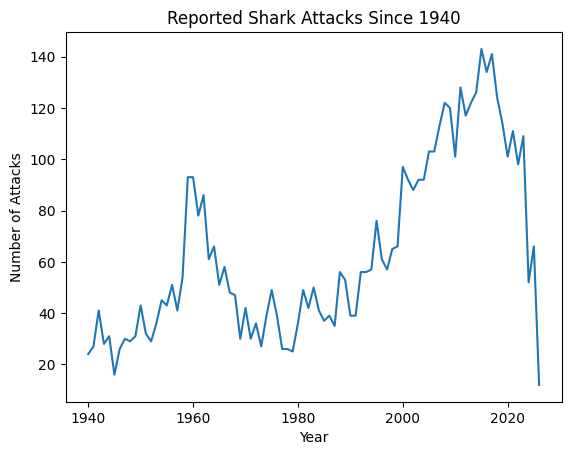

In [61]:
attacks_per_year = shark_recent['Year_clean'].value_counts().sort_index()

attacks_per_year.plot()
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Reported Shark Attacks Since 1940")
plt.show()


Reported shark attacks increase over time, likely reflecting increased reporting and human ocean activity rather than a true rise in shark aggression.

#### 2.5

In [62]:
shark['Age_clean'] = pd.to_numeric(shark['Age'], errors='coerce')

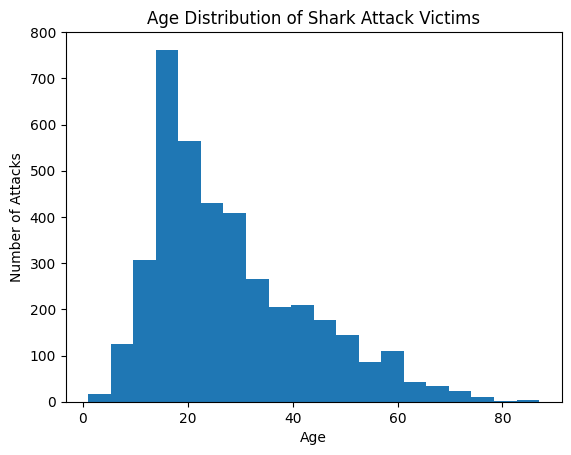

In [63]:
plt.hist(shark['Age_clean'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.title("Age Distribution of Shark Attack Victims")
plt.show()


#### 2.6

In [64]:
shark['Type_clean'] = shark['Type'].str.strip()

shark['Type_clean'] = shark['Type_clean'].where(
    shark['Type_clean'].isin(['Provoked', 'Unprovoked']),
    'Unknown'
)


In [65]:
shark['Type_clean'].value_counts(normalize=True)

Type_clean
Unprovoked    0.738620
Unknown       0.170342
Provoked      0.091038
Name: proportion, dtype: float64

#### 2.7

In [66]:
shark['Fatal_clean'] = shark['Fatal Y/N'].str.strip()

shark['Fatal_clean'] = shark['Fatal_clean'].where(
    shark['Fatal_clean'].isin(['Y', 'N']),
    'Unknown'
)

#### 2.8

In [67]:
pd.crosstab(
    shark['Type_clean'],
    shark['Fatal_clean'],
    normalize='index'
)


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.951863,0.015528,0.032609
Unknown,0.373444,0.460581,0.165975
Unprovoked,0.742201,0.015311,0.242488


Unprovoked attacks are more likely to result in fatalities than provoked attacks. Provoked incidents often occur in controlled contexts, while unprovoked attacks involve greater surprise and vulnerability. Reporting bias and missing data may affect these results.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

### Question 3: 

#### 3.1 

The paper is about defining a standard structure for datasets, called tidy data, that makes data easier to clean, analyze, and visualize. Wickham argues that many difficulties in data analysis come not from the analysis itself, but from inconsistent or messy data structures. The paper proposes a clear framework for organizing data so that tools and workflows can be applied more efficiently and consistently.

#### 3.2

The tidy data standard is intended to provide a consistent and intuitive way to organize datasets so that each variable, observation, and value has a clear place. This standard makes data easier to manipulate, analyze, and model, and allows tools to work together more seamlessly. By standardizing data structure, analysts can spend less time cleaning data and more time interpreting results.

#### 3.3

“Like families, tidy datasets are all alike but every messy dataset is messy in its own way.”

This means that tidy datasets all follow the same structural rules, while messy datasets can be messy in countless different ways. Because messiness is inconsistent, it is harder to create general tools to work with messy data, whereas tidy data enables reusable and predictable workflows.

“For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general.”

This means that while it may feel intuitive to identify variables and observations in a specific dataset, it is much harder to define these concepts in a way that applies universally across all datasets. Different contexts and research questions can change what counts as an observation or a variable, making formal definitions challenging.

#### 3.4

According to Wickham, values are the individual entries in a dataset (the actual numbers, strings, or measurements). Variables are attributes that are measured and can vary across observations (they form columns). Observations are individual units of analysis (they form rows).

#### 3.5

A dataset is tidy if:

1. Each variable forms a column

2. Each observation forms a row

3. Each type of observational unit forms its own table

This structure ensures clarity, consistency, and compatibility with common data analysis tools.

#### 3.6

The five most common problems Wickham identifies are:

1. Column headers are values, not variable names

2. Multiple variables are stored in one column

3. Variables are stored in both rows and columns

4. Multiple types of observational units are stored in the same table

5. A single observational unit is stored across multiple tables

Table 4 is messy because column names represent values of a variable rather than variables themselves. This makes it difficult to analyze or reshape the data, since variable meanings are embedded in the column headers instead of being explicit.

Melting is the process of converting data from a wide format to a long format, where column headers that represent values are transformed into a single variable column. This is a key step in making data tidy.

#### 3.7

Table 11 is messy because information about variables is spread across column names, and multiple variables are encoded in the structure of the table itself. This makes the dataset harder to analyze and manipulate. Table 12 is tidy and “molten” because variables are explicitly represented as columns, values appear only in cells and observations are clearly represented as rows. By melting Table 11 into Table 12, the dataset is reshaped into a tidy format that aligns with Wickham’s tidy data principles.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

### Question 4: 

#### 4.1

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fg = pd.read_csv("data/ForeignGifts_edu.csv")
fg.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


#### 4.2

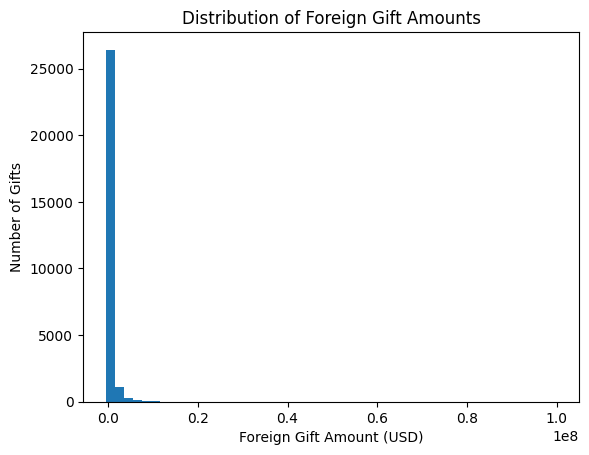

In [69]:
plt.hist(fg['Foreign Gift Amount'].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

In [70]:
fg['Foreign Gift Amount'].describe()

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

The distribution of foreign gift amounts is highly right-skewed. Most gifts are relatively small, while a small number of very large gifts account for a substantial portion of the total funding. This indicates that foreign funding is dominated by a few high-value transfers rather than many evenly sized contributions.

#### 4.3 

In [71]:
gift_type_counts = fg['Gift Type'].value_counts(normalize=True)
gift_type_counts

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

In [72]:
fg['Gift Type'].value_counts()

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

Monetary gifts make up the largest proportion of foreign gifts, followed by contracts, with real estate comprising a much smaller share. This suggests that most foreign financial involvement takes the form of direct monetary transfers rather than physical assets.

#### 4.4

In [73]:
top_countries_count = (
    fg.groupby('Country of Giftor')
      .count()['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top_countries_count


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

The countries with the highest number of gifts tend to be those with strong economic ties to the United States and established relationships with American universities.

#### 4.5

In [74]:
top_countries_amount = (
    fg.groupby('Country of Giftor')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top_countries_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

While some countries appear frequently as giftors, the countries that give the most money are not always the same as those with the highest number of gifts, indicating that gift size varies substantially by country.

#### 4.6

In [75]:
top_institutions = (
    fg.groupby('Institution Name')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top_institutions


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

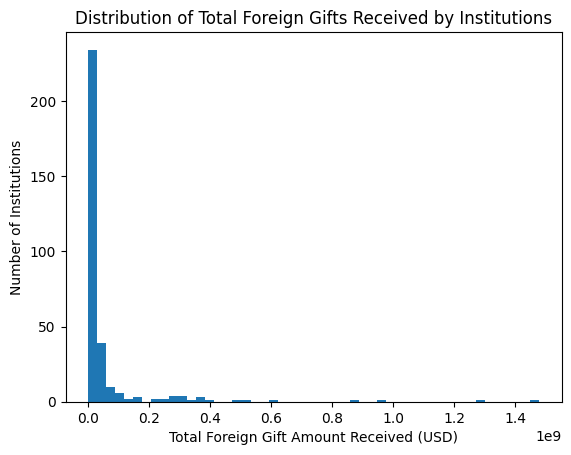

In [76]:
institution_totals = (
    fg.groupby('Institution Name')
      .sum(numeric_only=True)['Foreign Gift Amount']
)

plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount Received (USD)")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts Received by Institutions")
plt.show()


The histogram shows a highly skewed distribution, where most institutions receive relatively modest foreign funding, while a small number of universities receive extremely large total amounts. This suggests foreign funding is concentrated among a small subset of institutions.

#### 4.7

In [77]:
top_giftors = (
    fg.groupby('Giftor Name')
      .sum(numeric_only=True)['Foreign Gift Amount']
      .sort_values(ascending=False)
      .head(15)
)

top_giftors


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

A small number of giftors account for a disproportionately large share of foreign funding, indicating that individual organizations or entities play an outsized role in financing U.S. higher education from abroad.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

### Question 5

#### 5.1 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

college = pd.read_csv("data/college_completion.csv")

In [81]:
college.shape

(3798, 63)

In [82]:
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


The dataset contains information on U.S. colleges, including institutional characteristics, student aid, and graduation outcomes.

#### 5.2 

In [83]:
pd.crosstab(college['control'], college['level'])


level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public institutions are split between 2-year and 4-year schools, while private not-for-profit institutions are overwhelmingly 4-year. Private for-profit institutions are more concentrated among 2-year institutions. This reflects structural differences in institutional missions across control types.

#### 5.3

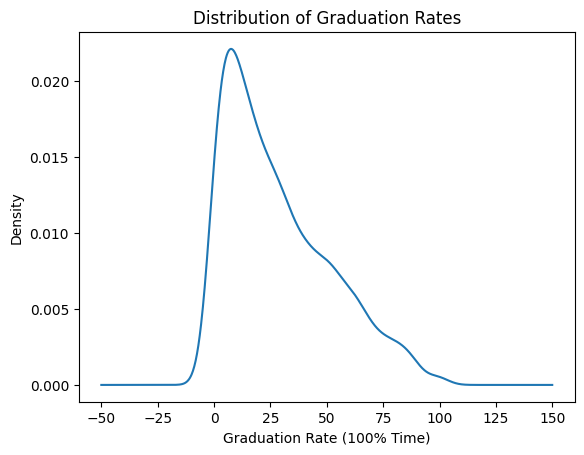

In [88]:
college['grad_100_value'].plot(kind='density')
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Distribution of Graduation Rates")
plt.show()

In [89]:
college['grad_100_value'].describe()


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

Graduation rates vary widely across institutions, with a broad distribution and substantial spread. This indicates large differences in student completion outcomes across colleges.

#### 5.4

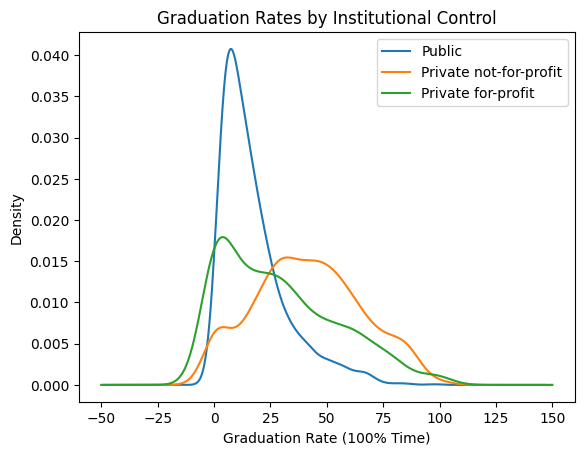

In [90]:
for ctrl in college['control'].dropna().unique():
    college[college['control'] == ctrl]['grad_100_value'].plot(
        kind='density', label=ctrl
    )

plt.xlabel("Graduation Rate (100% Time)")
plt.title("Graduation Rates by Institutional Control")
plt.legend()
plt.show()


In [91]:
college.groupby('control')['grad_100_value'].describe()


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


Private not-for-profit institutions tend to have the highest graduation rates, followed by public institutions. Private for-profit institutions generally show lower graduation rates and greater variability, suggesting less favorable completion outcomes.

#### 5.5

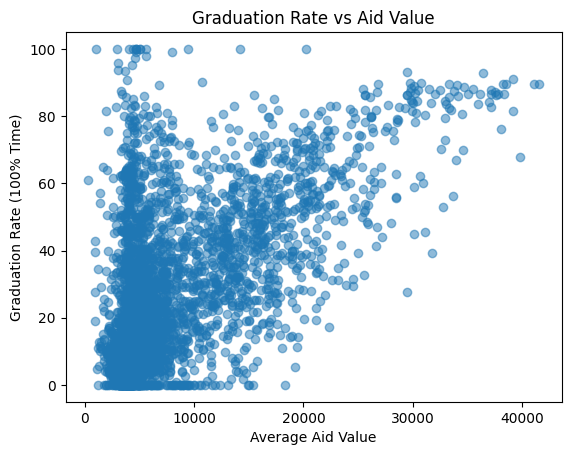

In [92]:
plt.scatter(college['aid_value'], college['grad_100_value'], alpha=0.5)
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Aid Value")
plt.show()


In [94]:
college[['aid_value', 'grad_100_value']].cov()
college[['aid_value', 'grad_100_value']].corr()

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


There is a weak positive relationship between aid value and graduation rates overall. While higher aid is associated with somewhat higher completion rates, the relationship is not strong and varies substantially across institutions.

#### 5.6

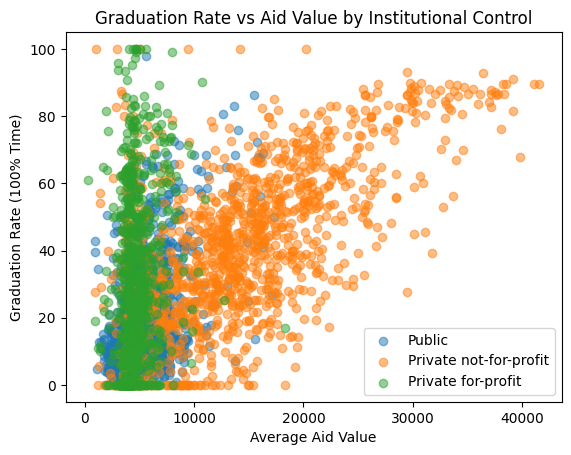

In [95]:
for ctrl in college['control'].dropna().unique():
    subset = college[college['control'] == ctrl]
    plt.scatter(subset['aid_value'], subset['grad_100_value'], alpha=0.5, label=ctrl)

plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Aid Value by Institutional Control")
plt.legend()
plt.show()


In [96]:
college.groupby('control')[['aid_value', 'grad_100_value']].corr()

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

The positive association between aid and graduation rates is strongest among private not-for-profit institutions, where higher aid levels tend to correspond with higher completion rates. Public institutions show a weaker relationship, while private for-profit institutions exhibit little to no positive association, suggesting that higher aid does not consistently translate into improved graduation outcomes for those schools.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

#### Question 6: Uploaded to repo

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

#### Question 7

#### 7.1

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ames = pd.read_csv("data/ames_prices.csv")
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [98]:
ames[['price', 'Bldg.Type']].info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      2930 non-null   int64
 1   Bldg.Type  2930 non-null   str  
dtypes: int64(1), str(1)
memory usage: 45.9 KB


#### 7.2

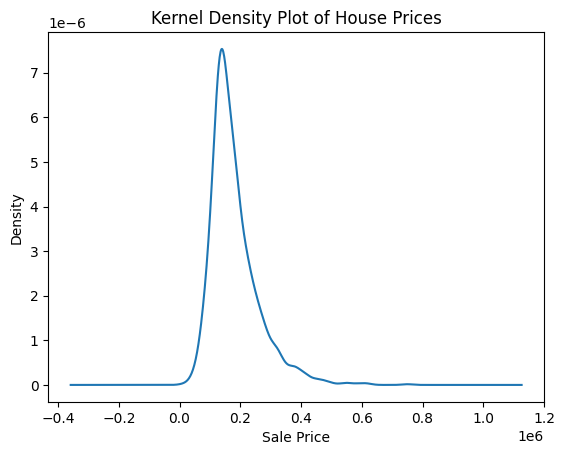

In [99]:
ames['price'].plot(kind='density')
plt.xlabel("Sale Price")
plt.title("Kernel Density Plot of House Prices")
plt.show()

In [100]:
ames['price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

House prices are highly right-skewed, with most homes clustered at lower price points and a long right tail of very expensive properties. The mean is greater than the median, reflecting the influence of high-priced outliers.

#### 7.3

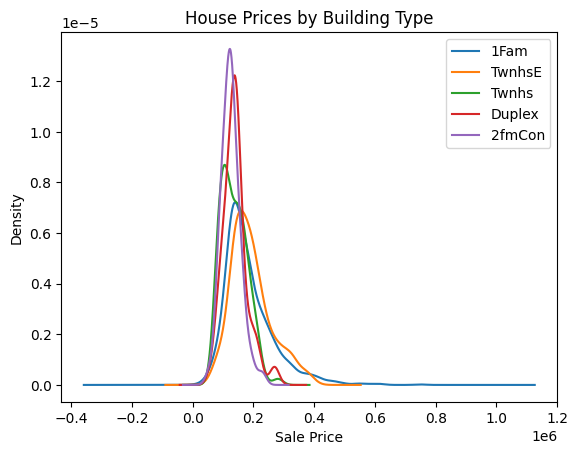

In [101]:
for btype in ames['Bldg.Type'].unique():
    ames[ames['Bldg.Type'] == btype]['price'].plot(
        kind='density', label=btype
    )

plt.xlabel("Sale Price")
plt.title("House Prices by Building Type")
plt.legend()
plt.show()


In [102]:
ames.groupby('Bldg.Type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


Single-family homes tend to be the most expensive on average, while duplexes and two-family conversions are generally less expensive. Single-family homes also exhibit the greatest variance in prices, reflecting a wider range of property sizes and qualities.

#### 7.4

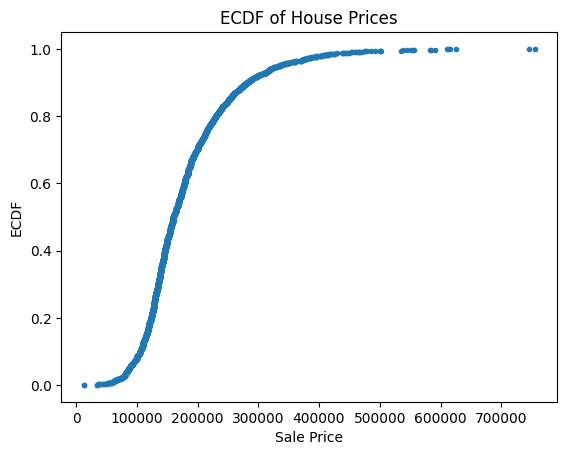

In [103]:
prices_sorted = np.sort(ames['price'])
ecdf = np.arange(1, len(prices_sorted) + 1) / len(prices_sorted)

plt.plot(prices_sorted, ecdf, marker='.', linestyle='none')
plt.xlabel("Sale Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()


In [104]:
ames['price'].quantile([0, 0.25, 0.5, 0.75, 1.0])


0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

The ECDF highlights the strong right skew in housing prices, with a large proportion of homes selling below the upper tail of very expensive properties.

#### 7.5

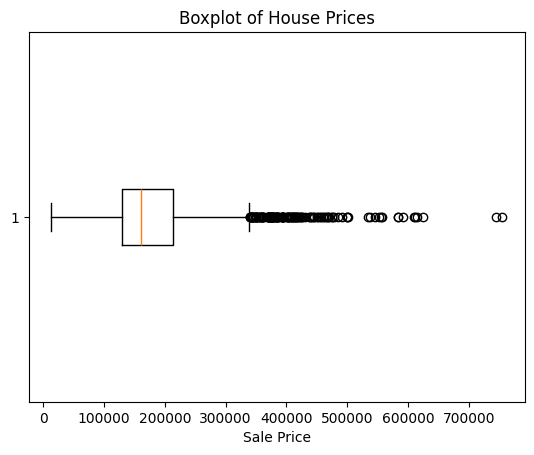

In [105]:
plt.boxplot(ames['price'], vert=False)
plt.xlabel("Sale Price")
plt.title("Boxplot of House Prices")
plt.show()


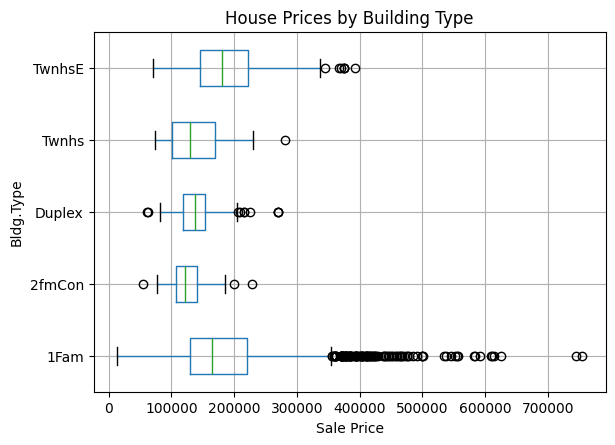

In [106]:
ames.boxplot(column='price', by='Bldg.Type', vert=False)
plt.xlabel("Sale Price")
plt.title("House Prices by Building Type")
plt.suptitle("")
plt.show()


The boxplots reveal numerous high-price outliers, especially among single-family homes. Price distributions differ substantially across building types, with single-family homes showing both higher medians and greater dispersion.

#### 7.6

In [107]:
Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ames['price_outlier'] = (
    (ames['price'] < lower_bound) | (ames['price'] > upper_bound)
).astype(int)

ames['price_outlier'].value_counts()


price_outlier
0    2793
1     137
Name: count, dtype: int64

A relatively small fraction of observations are classified as outliers, almost all of which occur in the upper tail of the price distribution.

#### 7.7

In [109]:
lower_w = ames['price'].quantile(0.05)
upper_w = ames['price'].quantile(0.95)

ames['price_winsorized'] = ames['price'].clip(lower=lower_w, upper=upper_w)

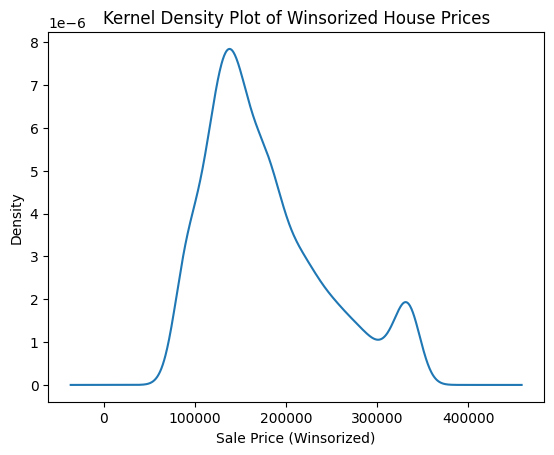

In [110]:
ames['price_winsorized'].plot(kind='density')
plt.xlabel("Sale Price (Winsorized)")
plt.title("Kernel Density Plot of Winsorized House Prices")
plt.show()

In [111]:
ames['price_winsorized'].describe()

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsorized, dtype: float64

Winsorizing the price variable reduces the influence of extreme values, resulting in a less skewed distribution and lower variance. The mean becomes closer to the median, making summary statistics more representative of typical home prices, while preserving the overall structure of the data.